In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn_pandas import DataFrameMapper
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import joblib
from collections import Counter
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
beer_csv = pd.read_csv("/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/PredictivePandas/data/final_beerdata_binary.gz", compression="gzip")

Index(['corn-like', 'Malty'], dtype='object')

In [4]:
kmean_df = beer_csv[['beer_abv',
 'numberof_reviews',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste', 
 'beer_style_ale',
 'beer_style_barleywine',
 'beer_style_bitter',
 'beer_style_exotic',
 'beer_style_ipa',
 'beer_style_kölsch',
 'beer_style_lager',
 'beer_style_pilsener',
 'beer_style_porter',
 'beer_style_stout',
 'beer_style_trappist',
 'beer_strength_Full',
 'beer_strength_Heavy',
 'beer_strength_Light',
 'beer_strength_Mid',
 'beer_strength_Very Strong'
 ]]



In [5]:
#Testing Scaling all informatoin on model result
# Utlimately wasnt useful
#mapper = DataFrameMapper([(kmean_df.columns, StandardScaler())])
#scaled_features = mapper.fit_transform(kmean_df.copy())
#scaled_features_df = pd.DataFrame(scaled_features, index=kmean_df.index, columns=kmean_df.columns)

In [6]:
dataset = kmean_df

In [7]:
#convert DF into Numpy array for the model
dataset = dataset.to_numpy()

In [8]:
#inital test conditions for Model
kmeans = KMeans(n_clusters=22, init='k-means++', n_init=100,max_iter=300, n_jobs=17,algorithm='auto', verbose=2)

In [9]:
#Fit Model to Dataset
model = kmeans.fit(dataset)

/opt/anaconda3/envs/PythonAdvanced/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Initialization complete
Iteration 0, inertia 2244922.7231627787
Iteration 1, inertia 1994324.2662220418
Iteration 2, inertia 1933916.446788587
Iteration 3, inertia 1880220.4051757243
Iteration 4, inertia 1845395.6132731407
Iteration 5, inertia 1823274.5945169178
Iteration 6, inertia 1806276.7383704798
Iteration 7, inertia 1800132.3904496785
Iteration 8, inertia 1786396.863760013
Iteration 9, inertia 1779040.1826351662
Iteration 10, inertia 1768717.1350030985
Iteration 11, inertia 1760748.1521557346
Iteration 12, inertia 1756343.640443242
Iteration 13, inertia 1752177.8232872116
Iteration 14, inertia 1747013.9328954732
Iteration 15, inertia 1744987.2962387507
Iteration 16, inertia 1743940.5748104483
Iteration 17, inertia 1743760.9785321746
Iteration 18, inertia 1743678.9579068236
Iteration 19, inertia 1743612.2202666376
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 2205147.977950204
Iteration 1, inertia 1877134.6294697672
Iteration 2, inerti

Initialization complete
Iteration 0, inertia 2523456.6639523953
Iteration 1, inertia 2015996.9705536307
Iteration 2, inertia 1915945.2871901162
Iteration 3, inertia 1875941.7181129456
Iteration 4, inertia 1816722.1869927598
Iteration 5, inertia 1795817.391358437
Iteration 6, inertia 1794053.8622503055
Iteration 7, inertia 1793181.5713028621
Iteration 8, inertia 1793005.3633302392
Iteration 9, inertia 1792888.8970262194
Iteration 10, inertia 1792787.6457294968
Iteration 11, inertia 1792596.8179078286
Iteration 12, inertia 1792472.4347118181
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2536648.0951943733
Iteration 1, inertia 2116660.46963609
Iteration 2, inertia 2049551.5681246899
Iteration 3, inertia 2021999.6322473518
Iteration 4, inertia 2006221.590743493
Iteration 5, inertia 1992514.8118608866
Iteration 6, inertia 1979480.011625877
Iteration 7, inertia 1968580.0423181967
Iteration 8, inertia 1962614.1578379797
Iteration 9, inertia 195845

Initialization complete
Iteration 0, inertia 2114034.7686254154
Iteration 1, inertia 1788232.7271000065
Iteration 2, inertia 1728405.1006627209
Iteration 3, inertia 1707349.1929224008
Iteration 4, inertia 1697101.4651976402
Iteration 5, inertia 1692655.853283481
Iteration 6, inertia 1683952.8987970296
Iteration 7, inertia 1682849.531767765
Iteration 8, inertia 1681975.990380397
Iteration 9, inertia 1681432.0772975832
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 2408063.6428473773
Iteration 1, inertia 1973426.0369984477
Iteration 2, inertia 1908692.6229309153
Iteration 3, inertia 1879051.257000056
Iteration 4, inertia 1872049.9794880725
Iteration 5, inertia 1870224.4843685245
Iteration 6, inertia 1866556.4900832823
Iteration 7, inertia 1862574.366863519
Iteration 8, inertia 1858191.8071274569
Iteration 9, inertia 1853580.4354755806
Iteration 10, inertia 1848665.0538350577
Iteration 11, inertia 1843337.6943708616
Iteration 12, inertia 1838597

Initialization complete
Iteration 0, inertia 2598874.210144555
Iteration 1, inertia 2019415.4023511615
Iteration 2, inertia 1976914.128215217
Iteration 3, inertia 1955722.0457723571
Iteration 4, inertia 1938802.093111873
Iteration 5, inertia 1922692.8231347564
Iteration 6, inertia 1906186.6960199752
Iteration 7, inertia 1888655.140746082
Iteration 8, inertia 1868599.3788147666
Iteration 9, inertia 1851346.3174595607
Iteration 10, inertia 1836156.0931962407
Iteration 11, inertia 1823703.887265118
Iteration 12, inertia 1815471.9725265775
Iteration 13, inertia 1804606.6078998784
Iteration 14, inertia 1801102.8277416404
Iteration 15, inertia 1799843.2403302286
Iteration 16, inertia 1799597.8249297224
Converged at iteration 16: center shift 0.05073868892473152 within tolerance 0.19415540416480753.
Initialization complete
Iteration 0, inertia 2204960.573542389
Iteration 1, inertia 1816525.8380782835
Iteration 2, inertia 1802652.9838985794
Iteration 3, inertia 1793096.734175915
Iteration 4, i

Iteration 10, inertia 1769929.7768483825
Iteration 11, inertia 1768405.223196077
Iteration 12, inertia 1766566.560743105
Iteration 13, inertia 1764248.7743352838
Iteration 14, inertia 1760736.2534311437
Iteration 15, inertia 1756232.6099764016
Iteration 16, inertia 1753339.3233039463
Iteration 17, inertia 1749417.594581994
Iteration 18, inertia 1740556.0505627692
Iteration 19, inertia 1733025.0685269346
Iteration 20, inertia 1722457.5272377317
Iteration 21, inertia 1714062.6822716491
Iteration 22, inertia 1708952.442543341
Iteration 23, inertia 1705604.7792268565
Iteration 24, inertia 1703440.6078187393
Iteration 25, inertia 1697700.933919483
Iteration 26, inertia 1695763.492017232
Iteration 27, inertia 1690977.2898273426
Iteration 28, inertia 1689695.3040673467
Iteration 29, inertia 1688786.4141464252
Iteration 30, inertia 1688550.3075410328
Iteration 31, inertia 1688441.55902071
Converged at iteration 31: center shift 0.09316384410702365 within tolerance 0.19415540416480753.
Initiali

Iteration 0, inertia 2238794.683476752
Iteration 1, inertia 1903328.8040291113
Iteration 2, inertia 1854436.309055851
Iteration 3, inertia 1828786.8867447167
Iteration 4, inertia 1819898.7137920407
Iteration 5, inertia 1815163.3545855822
Iteration 6, inertia 1808950.667880148
Iteration 7, inertia 1806369.8144703812
Iteration 8, inertia 1805972.4774047434
Iteration 9, inertia 1805360.5505494054
Converged at iteration 9: center shift 0.00033485482989867267 within tolerance 0.19415540416480753.
Initialization complete
Iteration 0, inertia 2327685.8884250396
Iteration 1, inertia 1992291.6264788473
Iteration 2, inertia 1951484.6573437739
Iteration 3, inertia 1929506.447956596
Iteration 4, inertia 1903728.329751164
Iteration 5, inertia 1870888.428099297
Iteration 6, inertia 1854309.5042262413
Iteration 7, inertia 1841554.6420896319
Iteration 8, inertia 1831805.1801584861
Iteration 9, inertia 1828685.5507519823
Iteration 10, inertia 1825628.8485774142
Iteration 11, inertia 1822661.9268920105


Iteration 8, inertia 1804382.487083056
Iteration 9, inertia 1802483.602634394
Iteration 10, inertia 1800858.556373701
Iteration 11, inertia 1798976.8720535417
Iteration 12, inertia 1797545.498846619
Iteration 13, inertia 1796437.149260555
Iteration 14, inertia 1795171.4480939126
Iteration 15, inertia 1794748.034314267
Iteration 16, inertia 1794669.2423596988
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 2471617.0843738187
Iteration 1, inertia 1976092.4839417124
Iteration 2, inertia 1901409.1302408706
Iteration 3, inertia 1871404.9653493757
Iteration 4, inertia 1859345.7746120405
Iteration 5, inertia 1844031.4522616123
Iteration 6, inertia 1839653.8610485261
Iteration 7, inertia 1838132.241941826
Iteration 8, inertia 1837245.174829619
Iteration 9, inertia 1836416.9652771314
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 2545211.808215861
Iteration 1, inertia 2171690.915704932
Iteration 2, inertia 2

Iteration 1, inertia 1927729.254372798
Iteration 2, inertia 1880528.023754914
Iteration 3, inertia 1855386.096763841
Iteration 4, inertia 1842800.3345311927
Iteration 5, inertia 1834292.3602358662
Iteration 6, inertia 1828000.8473190581
Iteration 7, inertia 1822913.4027938244
Iteration 8, inertia 1818547.6318775425
Iteration 9, inertia 1816594.6785557263
Iteration 10, inertia 1815286.0025813007
Iteration 11, inertia 1814759.2054967813
Iteration 12, inertia 1813774.3843134467
Iteration 13, inertia 1813180.9112347807
Iteration 14, inertia 1813034.5976559713
Iteration 15, inertia 1812894.2663369232
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 2301100.6700484874
Iteration 1, inertia 1907022.4187000091
Iteration 2, inertia 1848427.169341896
Iteration 3, inertia 1812803.8535864905
Iteration 4, inertia 1797125.2715886536
Iteration 5, inertia 1784383.5732703134
Iteration 6, inertia 1773395.4760693696
Iteration 7, inertia 1765826.3626470997
Iterati

In [10]:
# initalise Variable for Silhouette review of data
beer_cluster = model.predict(dataset)

In [11]:
#Silouette Score
silhouette_score(dataset, beer_cluster, metric='euclidean')

0.6119581661637652

In [21]:
#Distribution of predicted Labels
Counter(kmeans.labels_)

Counter({20: 33,
         19: 961,
         0: 7953,
         2: 123,
         16: 59,
         10: 80,
         17: 183,
         15: 268,
         5: 59,
         8: 49,
         13: 136,
         9: 407,
         6: 218,
         11: 1976,
         4: 574,
         21: 82,
         14: 17,
         3: 14,
         1: 31,
         7: 15,
         18: 5,
         12: 3})

In [13]:
#Elbow review of Model to determine number of clusters
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
N = range(15,30) 
  
for n in N: 
    
    kmeanModel = KMeans(n_clusters=n).fit(dataset) 
    kmeanModel.fit(dataset)     
      
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / dataset.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[n] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / dataset.shape[0] 
    mapping2[n] = kmeanModel.inertia_ 

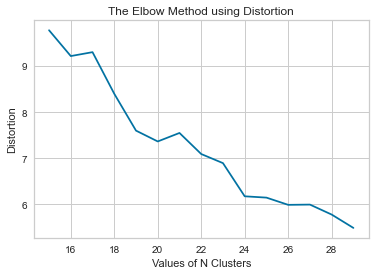

In [14]:
plt.plot(N, distortions, 'bx-') 
plt.xlabel('Values of N Clusters') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

/opt/anaconda3/envs/PythonAdvanced/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, model=None)

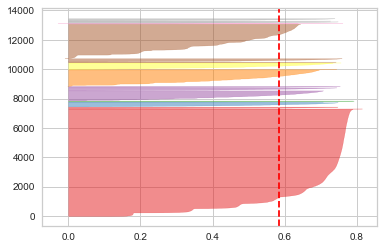

In [15]:
#Silhouette figure
sv = SilhouetteVisualizer(KMeans(22))
sv.fit(dataset)


In [16]:
#filename = '/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/data/kmean_model.sav'
#joblib.dump(model, filename)

In [17]:
#beer_raw_csv = pd.read_csv("/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/PredictivePandas/data/final_beerdata.csv")

In [18]:
#beer_csv["Kmeans Cluster"] = beer_cluster


In [19]:
#beer_csv.to_csv("beerlist_w_Kmean.csv", index=False)